In [29]:
import pandas as pd
import numpy as np
data=pd.read_csv('ANSUR II MALE Public Data.csv',encoding='latin1')
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082 entries, 0 to 4081
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    subjectid                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                   

In [46]:
data.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,waistheightomphalion,weightkg,wristcircumference,wristheight,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,1054,815,175,853,1,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,1054,726,167,815,1,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,1041,929,180,831,2,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,968,794,176,793,1,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,1245,946,188,954,2,2,21,77,213,Right hand


In [30]:
data.drop(['Gender','Date','PrimaryMOS','SubjectsBirthLocation','Ethnicity','Branch','Component'],axis=1,inplace=True)

In [31]:
data.drop('Installation',axis=1,inplace=True)

In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x=data.drop('WritingPreference',axis=1)
y=data['WritingPreference']
y_encoded=le.fit_transform(y)

In [33]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082 entries, 0 to 4081
Data columns (total 99 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   subjectid                       4082 non-null   int64
 1   abdominalextensiondepthsitting  4082 non-null   int64
 2   acromialheight                  4082 non-null   int64
 3   acromionradialelength           4082 non-null   int64
 4   anklecircumference              4082 non-null   int64
 5   axillaheight                    4082 non-null   int64
 6   balloffootcircumference         4082 non-null   int64
 7   balloffootlength                4082 non-null   int64
 8   biacromialbreadth               4082 non-null   int64
 9   bicepscircumferenceflexed       4082 non-null   int64
 10  bicristalbreadth                4082 non-null   int64
 11  bideltoidbreadth                4082 non-null   int64
 12  bimalleolarbreadth              4082 non-null   int64
 13  bit

In [34]:
import statsmodels.api as sm
x_const=sm.add_constant(x)
model=sm.GLM(y_encoded,x_const,family=sm.families.Gaussian())
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 4082
Model:                            GLM   Df Residuals:                     3982
Model Family:                Gaussian   Df Model:                           99
Link Function:               Identity   Scale:                         0.13189
Method:                          IRLS   Log-Likelihood:                -1606.8
Date:                Thu, 06 Feb 2025   Deviance:                       525.18
Time:                        21:26:55   Pearson chi2:                     525.
No. Iterations:                     3   Pseudo R-squ. (CS):            0.04447
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.0214      0.742      0.029      0.977      -1.433       1.476
subjectid                       6.305e-06   2.51e-06      2.512      0.012    1.39e-06    1.12e-05
abdominalextensiondepthsitting     0.0007      0.001      0.999      0.318      -0.001       0.002
acromialheight                     0.0013      0.001      1.332      0.183      -0.001       0.003
acromionradialelength             -0.0003      0.001     -0.175      0.861      -0.003       0.003
anklecircumference                -0.0004      0.001     -0.404      0.686      -0.002       0.001
axillaheight                      -0.0013      0.001     -1.703      0.089      -0.003       0.000
balloffootcircumference           -0.0010      0.001     -0.931      0.352      -0.003       0.001
balloffootlength                  -0.0007      0.002     -0.434      0.664      -0.004       0.003
biacromialbreadth               3.696e-05      0.001      0.044      0.965      -0.002       0.002
bicepscircumferenceflexed          0.0014      0.000      3.002      0.003       0.001       0.002
bicristalbreadth                8.697e-05      0.001      0.139      0.890      -0.001       0.001
bideltoidbreadth                2.724e-05      0.001      0.038      0.970      -0.001       0.001
bimalleolarbreadth                 0.0020      0.002      0.882      0.378      -0.002       0.006
bitragionchinarc                   0.0002      0.001      0.234      0.815      -0.001       0.002
bitragionsubmandibulararc          0.0005      0.001      0.677      0.498      -0.001       0.002
bizygomaticbreadth                -0.0019      0.002     -1.165      0.244      -0.005       0.001
buttockcircumference               0.0003      0.001      0.551      0.582      -0.001       0.001
buttockdepth                       0.0007      0.001      0.850      0.396      -0.001       0.002
buttockheight                      0.0003      0.001      0.605      0.545      -0.001       0.001
buttockkneelength                  0.0013      0.001      1.051      0.293      -0.001       0.004
buttockpopliteallength            -0.0015      0.001     -1.325      0.185      -0.004       0.001
calfcircumference                 -0.0004      0.001     -0.720      0.472      -0.001       0.001
cervicaleheight                    0.0005      0.001      0.455      0.649      -0.002       0.003
chestbreadth                       0.0018      0.001      2.758      0.006       0.001       0.003
chestcircumference                -0.0006      0.000     -1.681      0.093      -0.001    9.42e-05
chestdepth                         0.0015      0.001      1.907      0.056   -4.02e-05       0.003
chestheight                        0.0005      0.000      0.954      0.340      -0.000       0.001
crotchheight  

In [35]:
p_values = result.pvalues
significant_features = p_values[p_values < 0.05].index.tolist()#p value <0.05 are statistically significant features
significant_features = [feature for feature in significant_features if feature != 'const']
best_features = x[significant_features]


In [36]:
best_features

,subjectid,bicepscircumferenceflexed,chestbreadth,forearmcenterofgriplength,iliocristaleheight,lateralfemoralepicondyleheight,lateralmalleolusheight,sleevelengthspinewrist,waistheightomphalion,weightkg
0,10027,369,291,349,1071,500,77,883,1054,815
1,10032,338,269,348,1046,488,73,868,1054,726
2,10033,408,288,355,1053,482,72,910,1041,929
3,10092,359,296,352,986,452,76,848,968,794
4,10093,356,304,399,1251,585,85,995,1245,946
...,...,...,...,...,...,...,...,...,...,...
4077,29442,318,266,329,1025,476,68,865,1016,675
4078,29443,374,323,341,1057,510,67,903,1082,896
4079,29447,367,290,340,1032,466,71,860,1011,832
4080,29451,365,284,322,1050,489,70,874,1062,731


In [37]:
x_sel=best_features

In [38]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier,StackingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

In [39]:
xtrain,xtest,ytrain,ytest=train_test_split(x_sel,y_encoded,test_size=0.2,random_state=42)

In [40]:
#Gradient Boosting
gd_model=GradientBoostingClassifier(n_estimators=100,
                                   learning_rate=0.01,
                                   max_depth=3)
gd_model.fit(xtrain,ytrain)

GradientBoostingClassifier(learning_rate=0.01)

In [41]:
gdpred=gd_model.predict(xtest)
print("Accuracy: ",accuracy_score(ytest,gdpred))
print(classification_report(ytest,gdpred))#Accuracy of 87.6%

Accuracy:  0.8763769889840881
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        97
           2       0.88      1.00      0.93       716

    accuracy                           0.88       817
   macro avg       0.29      0.33      0.31       817
weighted avg       0.77      0.88      0.82       817



C:\Users\91944\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91944\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91944\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


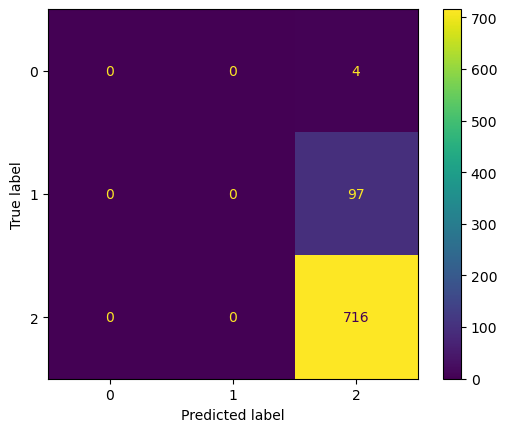

In [52]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
cm=confusion_matrix(ytest,gdpred)
cm_display=ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1,2])
cm_display.plot()

In [42]:
#Stacking Classifier
base_models=[('rf',RandomForestClassifier(n_estimators=100,random_state=42)),
             ('dt',DecisionTreeClassifier(criterion='entropy',splitter='best',random_state=42)),
             ('svc',SVC(probability=True,kernel='rbf',random_state=42))]
meta_model=LogisticRegression()
stack_model=StackingClassifier(estimators=base_models,final_estimator=meta_model,cv=5,stack_method='auto')
stack_model.fit(xtrain,ytrain)
stack_pred=stack_model.predict(xtest)
print("Accuracy : ",accuracy_score(ytest,stack_pred))
print(classification_report(ytest,stack_pred))#Accuracy of 87.6%

Accuracy :  0.8763769889840881
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        97
           2       0.88      1.00      0.93       716

    accuracy                           0.88       817
   macro avg       0.29      0.33      0.31       817
weighted avg       0.77      0.88      0.82       817



C:\Users\91944\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91944\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91944\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


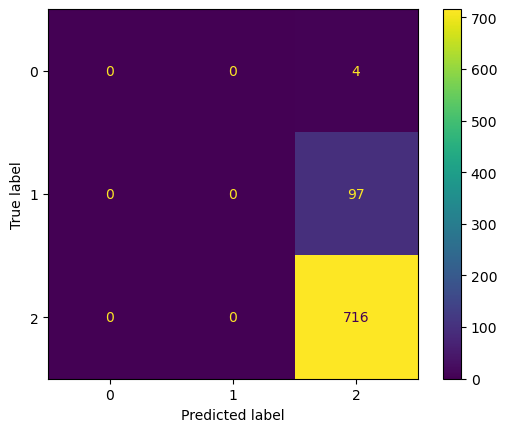

In [53]:
cm=confusion_matrix(ytest,stack_pred)
cm_display=ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1,2])
cm_display.plot()

In [43]:
#Naive bayes Classifier
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(xtrain,ytrain)
gnb_pred=gnb.predict(xtest)
print("Accuracy : ",accuracy_score(ytest,gnb_pred))
print(classification_report(ytest,gnb_pred))#Accuracy of 87.2%

Accuracy :  0.8727050183598531
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.33      0.01      0.02        97
           2       0.88      0.99      0.93       716

    accuracy                           0.87       817
   macro avg       0.40      0.33      0.32       817
weighted avg       0.81      0.87      0.82       817



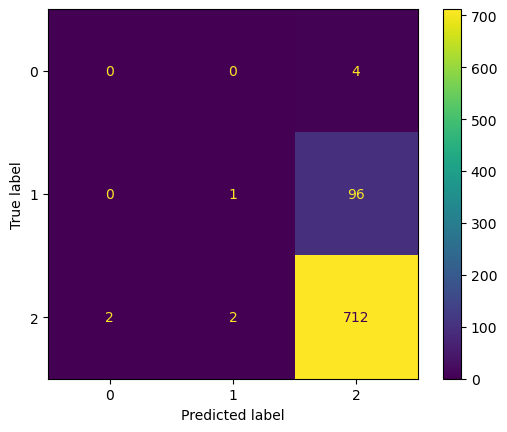

In [54]:
cm=confusion_matrix(ytest,gnb_pred)
cm_display=ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1,2])
cm_display.plot()

In [45]:
#Bagging Classifier
from sklearn.ensemble import BaggingClassifier
bg_model=BaggingClassifier(estimator=DecisionTreeClassifier(),
                           n_estimators=100,
                          bootstrap=True,
                          oob_score=True,max_samples=0.8,
                          random_state=42)
bg_model.fit(xtrain,ytrain)
bg_pred=bg_model.predict(xtest)
print("Accuracy : ",accuracy_score(ytest,bg_pred))
print(classification_report(ytest,bg_pred))#Accuracy of 87.7%

Accuracy :  0.8776009791921665
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.67      0.02      0.04        97
           2       0.88      1.00      0.93       716

    accuracy                           0.88       817
   macro avg       0.52      0.34      0.32       817
weighted avg       0.85      0.88      0.82       817



C:\Users\91944\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91944\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91944\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


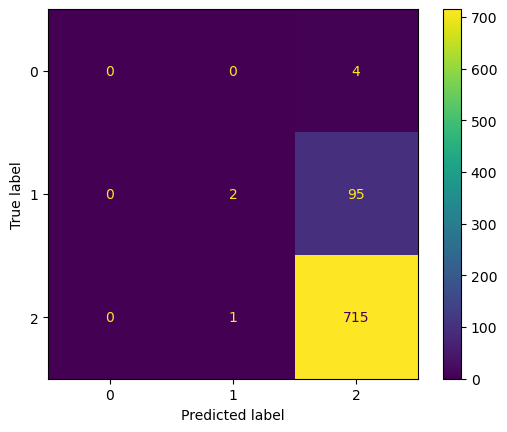

In [55]:
cm=confusion_matrix(ytest,bg_pred)
cm_display=ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1,2])
cm_display.plot()